<a href="https://colab.research.google.com/github/faryal-art/Uber-Data-Analytics-And-Fare-prediction/blob/main/UberDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Data Analytics And Fare Prediction

## Uber Data Analytics

##1. Load dataset

###1.1  Importing libraries

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


### 1.2 loading datset

In [298]:
df=pd.read_csv('ncr_ride_bookings.csv')
df.head()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### 1.3 Exploring the dataset
Explore the dataset by gaining important impormation like  info about the dataset(no of rows and columns) ,number of null and duplicate values

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [300]:
# see how many columns we have and what is there names
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [301]:
#  checking the datatypes of all columns
df.dtypes

,0
Date,object
Time,object
Booking ID,object
Booking Status,object
Customer ID,object
Vehicle Type,object
Pickup Location,object
Drop Location,object
Avg VTAT,float64
Avg CTAT,float64


In [302]:
print(f" Shape of dataset: {df.shape } ")

 Shape of dataset: (150000, 21) 


In [303]:
 df.describe ()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


##2. Data Cleaning

In [304]:
# check null values
print(f"Total no of null values across all the columns : {df.isnull().sum().sum() }")

Total no of null values across all the columns : 1123500


In [305]:
# shape of dataframe
df.shape

(150000, 21)

In [306]:
# no of null values columns vise
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [385]:
df.isnull().sum().sum()

np.int64(0)

In [307]:
# Duplicate values
df.duplicated().sum()

np.int64(0)

In [308]:
# duplicate vlues in customer id column
df["Customer ID"].duplicated().sum()

np.int64(1212)

## 3 Data visualization


In [309]:
#convert date and time
#before this date and time are string datatype
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Date'].dtype
# Convert 'Time' column to datetime objects
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S').dt.hour

#now they will consider as  datetime64[ns] (pandas datetime object). and time as datetime.time objects.

#### 3.1 Time-based Trends

1. Total rides & revenue over time
2. Rides by Day of Week
3. Rides by hours of day


##### 3.1.1 Total rides & revenue over time

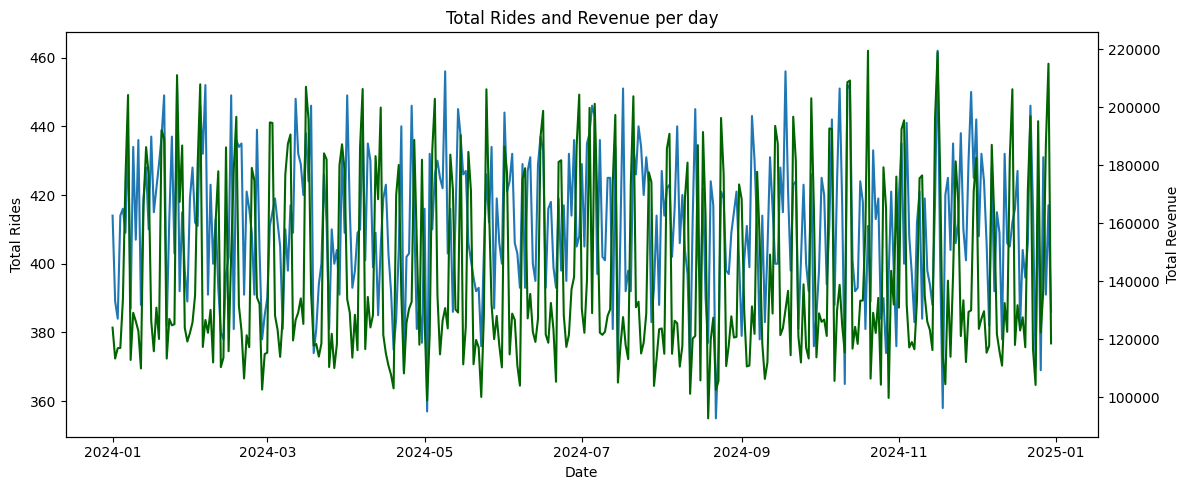

In [310]:
#3.1.1
#No of total rides and revenue over time
daily_summary=df.groupby("Date").agg({'Booking ID':'count','Booking Value':'sum'}).reset_index()

#ploting

fig, ax1 = plt.subplots(figsize=(12,5))

# Plot total rides (left y-axis)
ax1.plot(daily_summary['Date'],daily_summary['Booking ID'])
ax1.set_xlabel('Date')
ax1.set_ylabel("Total Rides")

## Create a second y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(daily_summary["Date"],daily_summary['Booking Value'],color="darkgreen" )
ax2.set_ylabel("Total Revenue" )


plt.title("Total Rides and Revenue per day")
fig.tight_layout()

plt.show()

 Can see how the number of rides and the revenue fluctuate from day to day.

 When the number of rides goes up, the revenue tends to go up as well, and when the number of rides goes down, the revenue also tends to decrease.

 This suggests that there is a positive relationship between the number of rides booked and the total revenue generated per day

##### 3.1.2 Rides per Day of Week

/tmp/ipython-input-2808175981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Date'].dt.day_name(), order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='pastel')


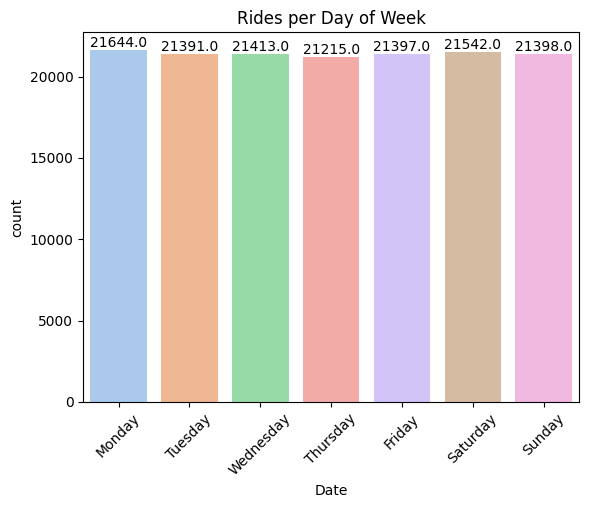

In [311]:
# 3.3.2 Rides per Day of Week
ax = sns.countplot(x=df['Date'].dt.day_name(), order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='pastel')
plt.title("Rides per Day of Week")
plt.xticks(rotation=45)

# Add the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

This show majority 0f rides we got on monday . Monday is the busiest day

For tuesday , friday and sunday these are almost same there is a slight difference

Minimum booking of rides we got on friday

##### 3.1.3 Rides per hour

/tmp/ipython-input-4268073332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Hour'], palette='viridis')


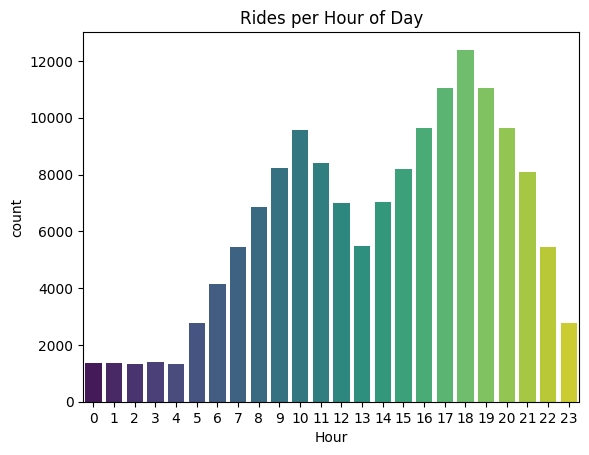

In [312]:
# Rides per hour
sns.countplot(x=df['Hour'], palette='viridis')
plt.title("Rides per Hour of Day")
plt.show()

* Ride bookings start to increase in the morning and peak during the late afternoon and evening (roughly from 17 to 20).

* Maximum rides are booked during evening this means that evening  hours are busiest

### 3.2 Basic Data Distributions

1. Fare distribution
2. Ride distribution

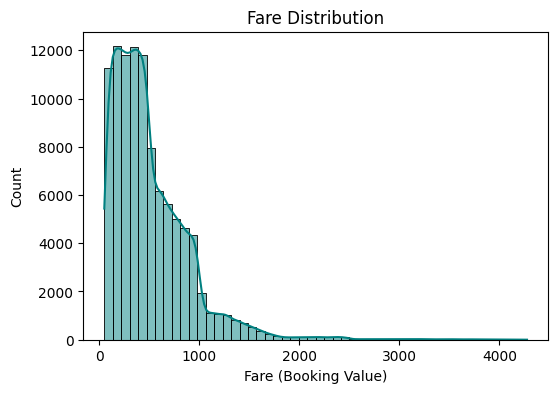

In [313]:
# Fare distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Booking Value'], bins=50, kde=True, color='teal')
plt.title("Fare Distribution")
plt.xlabel("Fare (Booking Value)")
plt.show()

This shows that majority the rides are booked in the value range from 200 - 800 .

 There's a peak around 400-600, indicating that this is the most frequent fare range.

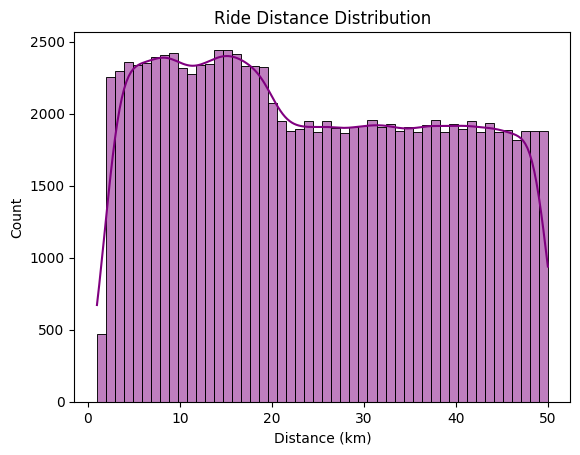

In [314]:
# Ride distribution
sns.histplot(df['Ride Distance'], bins=50, kde=True, color='purple')
plt.title("Ride Distance Distribution")
plt.xlabel("Distance (km)")
plt.show()


The spike at 10 to 20 km range shows that most frequentily the rides are booked are in the ranage of 10 to 20km

### 3.3 Categorical Feature Analysis
1. Vehicle Type Usage .
2. Payment Method Distribution
3.  Breakdown of booking status

##### 3.3.1 Vehicle type usage

/tmp/ipython-input-3359376647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Vehicle Type", data=df, order=df['Vehicle Type'].value_counts().index, palette="cool")


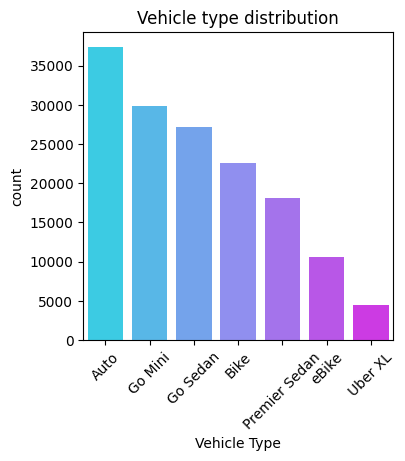

In [315]:
plt.figure(figsize=(4,4))
sns.countplot(x="Vehicle Type", data=df, order=df['Vehicle Type'].value_counts().index, palette="cool")
plt.title( "Vehicle type distribution")
plt.xticks(rotation=45)
plt.show()





Majority of the people use  Auto ,followed by Go Mini and others

Uber XL is least used vehicle

####3.3.2 Payment method distribution

/tmp/ipython-input-4206240908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, palette='Set3')


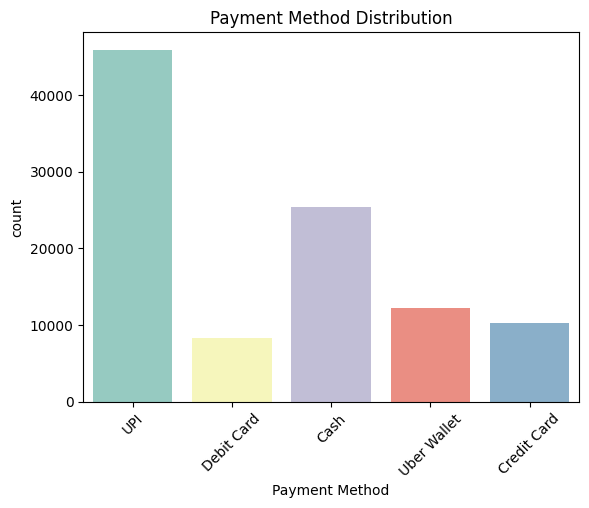

In [316]:

sns.countplot(x='Payment Method', data=df, palette='Set3')
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()


#### 3.3.3  Booking Status breadown

/tmp/ipython-input-1727806688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Booking Status',data=df,palette='pastel')


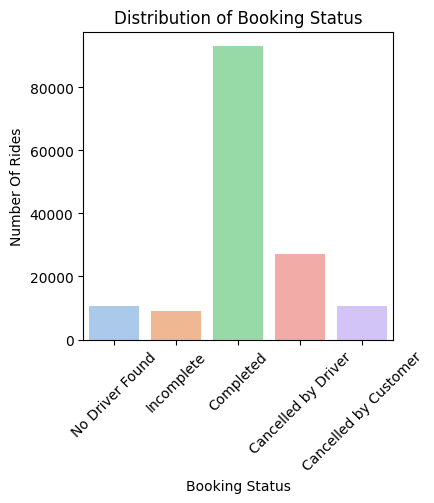

In [317]:
# Booking Status breadown
plt.figure(figsize=(4,4))
sns.countplot(x='Booking Status',data=df,palette='pastel')
plt.title('Distribution of Booking Status')
plt.ylabel('Number Of Rides')
plt.xticks(rotation=45)
plt.show()



### 3.4 Fare Relationships

1.Fare vs Distance (Scatter Plot)

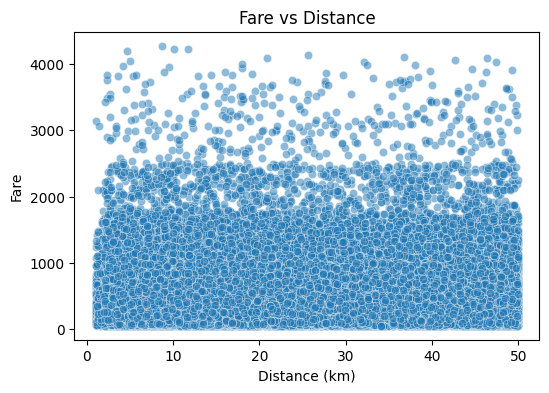

In [318]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df, alpha=0.5)
plt.title("Fare vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fare")
plt.show()


### 3.5 Top 10 pickup and dropoff locatiions

/tmp/ipython-input-1221083994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values,y=top_pickups.index,ax=axes[0],palette="Greens_r")
/tmp/ipython-input-1221083994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values,y=top_drops.index, ax=axes[1],palette='Blues_r')


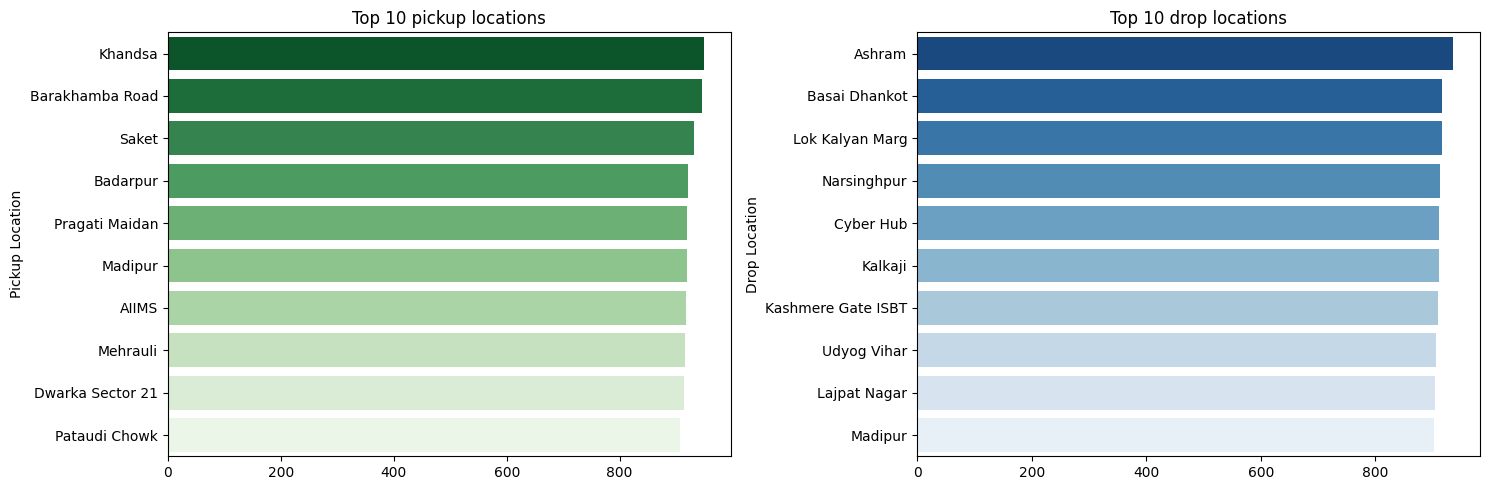

In [319]:
top_pickups=df['Pickup Location'].value_counts().head(10)
top_drops=df['Drop Location'].value_counts().head(10)

fig,axes=plt.subplots(1,2,figsize=(15,5))
# first bar chart
sns.barplot(x=top_pickups.values,y=top_pickups.index,ax=axes[0],palette="Greens_r")
axes[0].set_title("Top 10 pickup locations")

# 2nd barchaart
sns.barplot(x=top_drops.values,y=top_drops.index, ax=axes[1],palette='Blues_r')
axes[1].set_title("Top 10 drop locations")

plt.tight_layout()
plt.show()




### 3.6 Correlation Heatmap (Numerical Only)

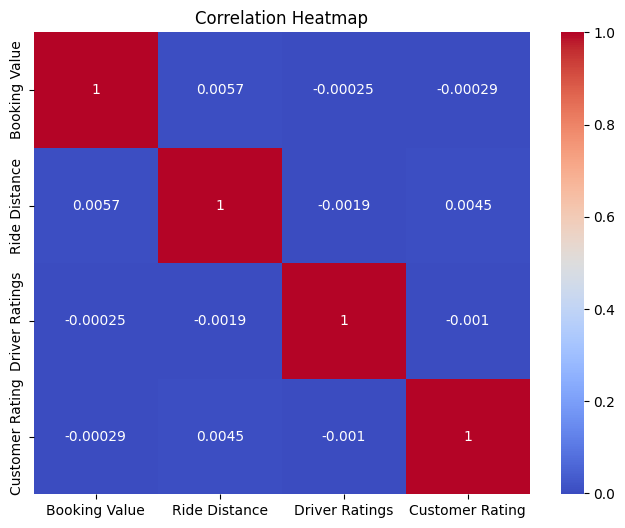

In [343]:
plt.figure(figsize=(8,6))
sns.heatmap(df_original[['Booking Value','Ride Distance','Driver Ratings','Customer Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 4. Modeling

#### 4.1 Data cleaning
1. keep only those rides that are completed
2. Remove missing values in important columns
3. Columns for Dayofweek, Time,Hour

In [354]:
# Reload the original data to ensure 'Booking Status' is present
df = pd.read_csv('ncr_ride_bookings.csv')

# Keep only completed rides (others don’t have proper fares)
df = df[df['Booking Status'] == 'Completed'].copy() # Add .copy() to avoid SettingWithCopyWarning

# Remove missing values in critical columns
df = df.dropna(subset=['Booking Value','Ride Distance','Date','Time','Incomplete Rides']).copy() # Add .copy()

# Convert 'Date' and 'Time' columns to datetime objects
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Drop rows where date or time conversion failed
df.dropna(subset=['Date', 'Time'], inplace=True)

# Keep only columns needed for feature engineering, modeling, and relevant visualizations
columns_to_keep = [
    'Date', 'Time', 'Booking Status', 'Booking Value', 'Ride Distance',
    'Driver Ratings', 'Customer Rating', 'Vehicle Type', 'Pickup Location',
    'Drop Location'
]
df = df[columns_to_keep].copy()

# Check data types of Date and Time after conversion
print("Data types of Date and Time after cleaning and conversion:")
print(df[['Date', 'Time']].dtypes)

Data types of Date and Time after cleaning and conversion:
Date    datetime64[ns]
Time    datetime64[ns]
dtype: object


In [348]:
# to ensure that incompleted values are droped
df['Booking Status'].unique()

array(['Completed'], dtype=object)

### 4.2 Feature engineering

In [355]:
 # Check data types of Date and Time before using .dt
print("Data types of Date and Time before feature engineering:")
df[['Date', 'Time']].info()

# forming a column for days of week
df['DayOfWeek'] = df['Date'].dt.dayofweek      # Monday=0, tuesday=1 and soo on

# Create 'Month' and 'IsWeekend' columns
df['Month'] = df['Date'].dt.month
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int) # Saturday and Sunday are weekends (5, 6)

# Extract the hour from the 'Time' column
df['Hour'] = df['Time'].dt.hour

Data types of Date and Time before feature engineering:
<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    93000 non-null  datetime64[ns]
 1   Time    93000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.1 MB


### 4.3 Feature Selection
* cat_cols = categorical features (text categories → Auto, Bike, Cash, etc.)

* num_cols = numeric features (numbers → distance, ratings, time values).

We need to treat them differently:

Categorical → One-Hot Encode (convert into 0/1 dummy variables)

Numeric → Keep as is

In [356]:
# 6. Select useful features
features = ['Ride Distance','Vehicle Type','Pickup Location','Drop Location',
            'Hour','DayOfWeek','Month','IsWeekend', 'Driver Ratings', 'Customer Rating']
target = 'Booking Value'



cat_cols = ['Vehicle Type','Pickup Location','Drop Location']
num_cols = ['Ride Distance','Hour','DayOfWeek','Month','IsWeekend', 'Driver Ratings', 'Customer Rating']


# Data transformation before training
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])



df = df[features + [target]]

### 4.4 Build the pipeline (preprocessing + model)

In [ ]:
#Pipeline → Chains steps so preprocessing and model training happen together.
#Randomforest do not do well in our case so we droped it and use linear regression
model = Pipeline([
    ('prep', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=10))
])

In [368]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model1 = Pipeline([
    ('prep', preprocessor),
    ('regressor',LinearRegression() )
])

###4.5 Train_test split

In [370]:
print(df.columns)
x= df[features]
y=df[target]

#train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#model training
model1.fit(x_train,y_train)

#model prediction
y_preds=model1.predict(x_test)

print(f" MSE : {mean_squared_error(y_test, y_preds)}")
print(f"R2: {r2_score(y_test, y_preds)}")

Index(['Ride Distance', 'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Hour', 'DayOfWeek', 'Month', 'IsWeekend', 'Driver Ratings',
       'Customer Rating', 'Booking Value'],
      dtype='object')
 MSE : 147704.80894576528
R2: 0.05370738313022616


As i have tried Random forest and linear regression model . Linear regression model works well on this dataset . I have tried polynomial regression model also but that does not work . Try to reduce outlier in Booking value column(by taking log ) it also did not work .